In [4]:
import numpy as np
import pandas as pd
import time

In [5]:
bicisXcel20 = pd.read_excel('data/AccidentesBicicletas_2020.xlsx')
bicisXcel21 = pd.read_excel('data/AccidentesBicicletas_2021.xlsx')
bicisXcel22 = pd.read_excel('data/AccidentesBicicletas_2022.xlsx')
bicisXcel23 = pd.read_excel('data/AccidentesBicicletas_2023.xlsx')

# Leemos los valores del fichero y los cargamos en un dataframe
bicis20 = pd.DataFrame(bicisXcel20)
bicis21 = pd.DataFrame(bicisXcel21)
bicis22 = pd.DataFrame(bicisXcel22)
bicis23 = pd.DataFrame(bicisXcel23)

dfBicis = pd.concat([bicis20, bicis21, bicis22, bicis23])
dfBicis

num_expediente      fecha      hora  \
0        2020S000044 2020-01-02  07:30:00   
1        2020S000151 2020-01-04  13:45:00   
2        2020S000153 2020-01-04  12:10:00   
3        2020S000153 2020-01-04  12:10:00   
4        2020S000212 2020-01-04  13:30:00   
...              ...        ...       ...   
12183    2023S013443 2023-03-31  13:30:00   
12184    2023S013443 2023-03-31  13:30:00   
12185    2023S013443 2023-03-31  13:30:00   
12186    2023S014588 2023-03-17  11:50:00   
12187    2023S014588 2023-03-17  11:50:00   

                                 localizacion numero  cod_distrito  \
0      CALL. ALBASANZ / CALL. RUFINO GONZALEZ     23          20.0   
1                            CALL. ORENSE, 12     12           6.0   
2       CALL. NUESTRA SEÑORA DE VALVERDE, 209    209           8.0   
3       CALL. NUESTRA SEÑORA DE VALVERDE, 209    209           8.0   
4           M-605, KM 1,600 SOMONTES (CAMINO)     20           8.0   
...                                       ...    ...           ...   
12183      CALL. MENDEZ ALVARO / CALL. RETAMA     93          13.0   
12184      CALL. MENDEZ ALVARO / CALL. RETAMA     93          13.0   
12185      CALL. MENDEZ ALVARO / CALL. RETAMA     93          13.0   
12186               PASEO. CASTELLANA / CUZCO    162           5.0   
12187               PASEO. CASTELLANA / CUZCO    162           5.0   

                  distrito     tipo_accidente estado_meteorológico  \
0      SAN BLAS-CANILLEJAS   Colisión frontal            Despejado   
1                   TETUÁN              Caída            Despejado   
2      FUENCARRAL-EL PARDO  Colisión múltiple            Despejado   
3      FUENCARRAL-EL PARDO  Colisión múltiple            Despejado   
4      FUENCARRAL-EL PARDO              Caída            Despejado   
...                    ...                ...                  ...   
12183   PUENTE DE VALLECAS            Alcance            Despejado   
12184   PUENTE DE VALLECAS            Alcance            Despejado   
12185   PUENTE DE VALLECAS            Alcance            Despejado   
12186            CHAMARTÍN            Alcance            Despejado   
12187            CHAMARTÍN            Alcance            Despejado   

      tipo_vehículo tipo_persona       rango_edad         sexo  cod_lesividad  \
0         Bicicleta    Conductor  De 40 a 44 años       Hombre              7   
1         Bicicleta    Conductor  De 21 a 24 años       Hombre              7   
2         Bicicleta    Conductor  De 10 a 14 años       Hombre              1   
3         Bicicleta    Conductor  De 45 a 49 años       Hombre              2   
4         Bicicleta    Conductor  De 35 a 39 años       Hombre              6   
...             ...          ...              ...          ...            ...   
12183           NaN    Conductor  De 25 a 29 años       Hombre             14   
12184           NaN    Conductor  De 40 a 44 años       Hombre              7   
12185           NaN     Pasajero  De 40 a 44 años        Mujer             14   
12186           NaN    Conductor      Desconocido  Desconocido              7   
12187           NaN    Conductor  De 50 a 54 años       Hombre             14   

                                               lesividad  coordenada_x_utm  \
0      Asistencia sanitaria sólo en el lugar del acci...      4.468640e+08   
1      Asistencia sanitaria sólo en el lugar del acci...      4.410475e+08   
2            Atención en urgencias sin posterior ingreso      4.419754e+08   
3                    Ingreso inferior o igual a 24 horas      4.419754e+08   
4      Asistencia sanitaria inmediata en centro de sa...      4.391659e+08   
...                                                  ...               ...   
12183                           Sin asistencia sanitaria      4.425613e+05   
12184  Asistencia sanitaria sólo en el lugar del acci...      4.425613e+05   
12185                           Sin asistencia sanitaria      4.425613e+05   
12186  Asistencia sanitaria só

In [6]:
dfCoordenadas = pd.DataFrame({'longitud': bicis23['coordenada_x_utm'],
                   'latitud': bicis23['coordenada_y_utm']})

In [7]:
dfCoordenadas.isnull().sum()

longitud    2
latitud     2
dtype: int64

In [8]:
dfCoordenadas = dfCoordenadas.dropna(subset = ['longitud', 'latitud'])

In [9]:
import statistics
meanLong = statistics.mean(dfCoordenadas['longitud'])
meanLat = statistics.mean(dfCoordenadas['latitud'])

In [15]:
!pip3 install folium
# import folium
import folium
# crear un mapa base centrado en Berlín
mapObj = folium.Map(location = [meanLat,meanLong], zoom_start = 15)
# crear objeto marcador para Berlín, uno por uno para cada ubicación en los datos DataFrame
for i in range(0,data.shape[0]): # .shape[0] for Pandas DataFrame is the number of rows
    # crear un marcador para el lugar i
    markerObj = folium.Marker(location = [lats[i],longs[i]])
    # añadir marcador al mapa
    markerObj.add_to(mapObj)
# mostrar mapa
mapObj

ValueError: Location values cannot contain NaNs.

In [20]:
mapa = folium.Map(location=[40.4167,  -3.70325 ])
dfCoordenadas.apply(lambda pu:folium.Marker(location=[pu['latitud'], pu['longitud']])
                                             .add_to(mapa), axis=1)

# display th map
mapa

In [31]:
dfBicis.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14840 entries, 0 to 12187
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   num_expediente        14840 non-null  object        
 1   fecha                 14840 non-null  datetime64[ns]
 2   hora                  14840 non-null  object        
 3   localizacion          14840 non-null  object        
 4   numero                14839 non-null  object        
 5   cod_distrito          14839 non-null  float64       
 6   distrito              14839 non-null  object        
 7   tipo_accidente        14840 non-null  object        
 8   estado_meteorológico  14840 non-null  object        
 9   tipo_vehículo         1774 non-null   object        
 10  tipo_persona          14840 non-null  object        
 11  rango_edad            14840 non-null  object        
 12  sexo                  14840 non-null  object        
 13  cod_lesividad   

In [10]:
from folium.plugins import HeatMap
#!pip3 install geopy
# importar el módulo geopy
import geopy
from geopy.extra.rate_limiter import RateLimiter

In [37]:
# fusionar el país, la ciudad y la calle en una sola cadena de direcciones
dfBicis["direccion"] = dfBicis["pais"] + ", " + dfBicis["ciudad"] + ", " + dfBicis["localizacion"].astype(str)

In [38]:
nom = ArcGIS(timeout=300)
# crear un objeto de servicio
service = geopy.Nominatim(user_agent = "myGeocoder")

In [45]:
    total_length = len(dfBicis)
    def make_file(data):
         data.to_csv('direccion', mode='a')
    query_start = 0
    query_end = query_start + 50
    while query_start < total_length + 1:
        brevinfo = dfBicis[query_start:query_end]
        brevinfo['Coordinates'] = brevinfo['direccion'].apply(service.geocode)
        brevinfo["Latitude"] = brevinfo["Coordinates"].apply(lambda x: 
                               x.latitude if x != None else None)
        brevinfo["Longitude"] = brevinfo["Coordinates"].apply(lambda x: 
                                x.longitude if x != None else None)
        print(brevinfo)
        make_file(brevinfo)
        query_start += 50
        query_end += 50
        time.sleep(1)

C:\Users\javi4\AppData\Local\Temp/ipykernel_35040/1535215485.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  brevinfo['Coordinates'] = brevinfo['direccion'].apply(service.geocode)
C:\Users\javi4\AppData\Local\Temp/ipykernel_35040/1535215485.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  brevinfo["Latitude"] = brevinfo["Coordinates"].apply(lambda x:
C:\Users\javi4\AppData\Local\Temp/ipykernel_35040/1535215485.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Dat

   num_expediente      fecha      hora  \
0     2020S000044 2020-01-02  07:30:00   
1     2020S000151 2020-01-04  13:45:00   
2     2020S000153 2020-01-04  12:10:00   
3     2020S000153 2020-01-04  12:10:00   
4     2020S000212 2020-01-04  13:30:00   
5     2020S000305 2020-01-07  12:35:00   
6     2020S000326 2020-01-05  15:30:00   
7     2020S000350 2020-01-07  12:50:00   
8     2020S000398 2020-01-08  19:15:00   
9     2020S000403 2020-01-08  19:35:00   
10    2020S000479 2020-01-09  21:30:00   
11    2020S000502 2020-01-10  08:55:00   
12    2020S000560 2020-01-10  23:55:00   
13    2020S000706 2020-01-12  09:50:00   
14    2020S000749 2020-01-11  16:00:00   
15    2020S000778 2020-01-07  21:48:00   
16    2020S000779 2020-01-12  21:30:00   
17    2020S000853 2020-01-13  21:00:00   
18    2020S000867 2020-01-14  17:30:00   
19    2020S000867 2020-01-14  17:30:00   
20    2020S000931 2020-01-15  17:45:00   
21    2020S000996 2020-01-06  16:30:00   
22    2020S001023 2020-01-10  13:0

C:\Users\javi4\AppData\Local\Temp/ipykernel_35040/1535215485.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  brevinfo['Coordinates'] = brevinfo['direccion'].apply(service.geocode)
C:\Users\javi4\AppData\Local\Temp/ipykernel_35040/1535215485.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  brevinfo["Latitude"] = brevinfo["Coordinates"].apply(lambda x:
C:\Users\javi4\AppData\Local\Temp/ipykernel_35040/1535215485.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Dat

   num_expediente      fecha      hora  \
50    2020S002426 2020-01-30  18:10:00   
51    2020S002454 2020-02-03  16:05:00   
52    2020S002495 2020-02-03  19:35:00   
53    2020S002635 2020-02-04  16:00:00   
54    2020S002639 2020-02-04  19:20:00   
55    2020S002768 2020-02-04  09:10:00   
56    2020S002809 2020-02-06  15:08:00   
57    2020S002809 2020-02-06  15:08:00   
58    2020S002810 2020-02-06  17:30:00   
59    2020S002812 2020-02-05  21:00:00   
60    2020S002818 2020-02-06  18:15:00   
61    2020S002851 2020-02-06  09:15:00   
62    2020S003019 2020-02-09  03:40:00   
63    2020S003019 2020-02-09  03:40:00   
64    2020S003033 2020-02-08  13:15:00   
65    2020S003081 2020-02-09  21:10:00   
66    2020S003108 2020-02-08  11:50:00   
67    2020S003258 2020-02-11  18:40:00   
68    2020S003264 2020-02-11  23:56:00   
69    2020S003338 2020-01-28  07:40:00   
70    2020S003428 2020-02-13  13:00:00   
71    2020S003480 2020-02-14  16:40:00   
72    2020S003505 2020-02-15  03:2

C:\Users\javi4\AppData\Local\Temp/ipykernel_35040/1535215485.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  brevinfo['Coordinates'] = brevinfo['direccion'].apply(service.geocode)
C:\Users\javi4\AppData\Local\Temp/ipykernel_35040/1535215485.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  brevinfo["Latitude"] = brevinfo["Coordinates"].apply(lambda x:
C:\Users\javi4\AppData\Local\Temp/ipykernel_35040/1535215485.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Dat

    num_expediente      fecha      hora  \
100    2020S004641 2020-02-29  08:50:00   
101    2020S004652 2020-02-29  12:30:00   
102    2020S004703 2020-03-01  04:15:00   
103    2020S004746 2020-03-01  14:30:00   
104    2020S004746 2020-03-01  14:30:00   
105    2020S004805 2020-03-01  14:00:00   
106    2020S004814 2020-02-28  21:30:00   
107    2020S004993 2020-03-04  20:40:00   
108    2020S005007 2020-03-04  13:30:00   
109    2020S005022 2020-03-04  14:00:00   
110    2020S005040 2020-03-05  15:05:00   
111    2020S005053 2020-03-05  16:05:00   
112    2020S005103 2020-03-05  12:00:00   
113    2020S005106 2020-02-23  14:00:00   
114    2020S005106 2020-02-23  14:00:00   
115    2020S005133 2020-03-06  16:45:00   
116    2020S005145 2020-03-05  18:35:00   
117    2020S005145 2020-03-05  18:35:00   
118    2020S005235 2020-03-07  15:00:00   
119    2020S005249 2020-03-07  18:50:00   
120    2020S005263 2020-03-07  22:30:00   
121    2020S005296 2020-03-07  13:55:00   
122    2020

C:\Users\javi4\AppData\Local\Temp/ipykernel_35040/1535215485.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  brevinfo['Coordinates'] = brevinfo['direccion'].apply(service.geocode)
C:\Users\javi4\AppData\Local\Temp/ipykernel_35040/1535215485.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  brevinfo["Latitude"] = brevinfo["Coordinates"].apply(lambda x:
C:\Users\javi4\AppData\Local\Temp/ipykernel_35040/1535215485.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Dat

    num_expediente      fecha      hora  \
150    2020S006621 2020-05-06  22:05:00   
151    2020S006635 2020-05-07  21:35:00   
152    2020S006640 2020-05-07  13:10:00   
153    2020S006649 2020-05-08  13:15:00   
154    2020S006668 2020-05-05  20:30:00   
155    2020S006668 2020-05-05  20:30:00   
156    2020S006680 2020-05-08  08:20:00   
157    2020S006694 2020-05-08  21:30:00   
158    2020S006694 2020-05-08  21:30:00   
159    2020S006696 2020-05-08  21:00:00   
160    2020S006696 2020-05-08  21:00:00   
161    2020S006701 2020-05-09  20:50:00   
162    2020S006707 2020-05-10  09:35:00   
163    2020S006707 2020-05-10  09:35:00   
164    2020S006713 2020-05-10  18:25:00   
165    2020S006720 2020-05-10  23:40:00   
166    2020S006722 2020-05-11  08:37:00   
167    2020S006729 2020-05-08  09:15:00   
168    2020S006738 2020-05-10  21:10:00   
169    2020S006762 2020-05-09  07:50:00   
170    2020S006783 2020-05-05  20:25:00   
171    2020S006787 2020-05-11  20:15:00   
172    2020

C:\Users\javi4\AppData\Local\Temp/ipykernel_35040/1535215485.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  brevinfo['Coordinates'] = brevinfo['direccion'].apply(service.geocode)
C:\Users\javi4\AppData\Local\Temp/ipykernel_35040/1535215485.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  brevinfo["Latitude"] = brevinfo["Coordinates"].apply(lambda x:
C:\Users\javi4\AppData\Local\Temp/ipykernel_35040/1535215485.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Dat

    num_expediente      fecha      hora  \
200    2020S007089 2020-05-21  09:10:00   
201    2020S007094 2020-05-21  20:40:00   
202    2020S007104 2020-05-21  20:20:00   
203    2020S007108 2020-05-21  20:20:00   
204    2020S007137 2020-05-22  20:00:00   
205    2020S007145 2020-05-23  19:50:00   
206    2020S007156 2020-05-23  11:30:00   
207    2020S007159 2020-05-23  08:15:00   
208    2020S007161 2020-05-24  08:45:00   
209    2020S007165 2020-05-23  23:00:00   
210    2020S007178 2020-05-23  21:00:00   
211    2020S007186 2020-05-24  21:15:00   
212    2020S007187 2020-05-24  21:00:00   
213    2020S007200 2020-05-25  08:20:00   
214    2020S007200 2020-05-25  08:20:00   
215    2020S007203 2020-05-25  09:10:00   
216    2020S007204 2020-05-23  09:00:00   
217    2020S007204 2020-05-23  09:00:00   
218    2020S007209 2020-05-22  23:25:00   
219    2020S007210 2020-05-24  20:25:00   
220    2020S007222 2020-05-25  16:00:00   
221    2020S007230 2020-05-25  17:30:00   
222    2020

C:\Users\javi4\AppData\Local\Temp/ipykernel_35040/1535215485.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  brevinfo['Coordinates'] = brevinfo['direccion'].apply(service.geocode)
C:\Users\javi4\AppData\Local\Temp/ipykernel_35040/1535215485.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  brevinfo["Latitude"] = brevinfo["Coordinates"].apply(lambda x:
C:\Users\javi4\AppData\Local\Temp/ipykernel_35040/1535215485.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Dat

    num_expediente      fecha      hora  \
250    2020S007605 2020-05-31  14:07:00   
251    2020S007618 2020-06-01  16:40:00   
252    2020S007621 2020-05-29  21:25:00   
253    2020S007621 2020-05-29  21:25:00   
254    2020S007626 2020-06-01  16:15:00   
255    2020S007632 2020-05-28  19:15:00   
256    2020S007634 2020-05-29  17:10:00   
257    2020S007636 2020-06-01  22:00:00   
258    2020S007646 2020-05-30  09:50:00   
259    2020S007668 2020-05-21  20:55:00   
260    2020S007677 2020-06-02  20:45:00   
261    2020S007677 2020-06-02  20:45:00   
262    2020S007678 2020-06-02  21:20:00   
263    2020S007679 2020-06-02  20:30:00   
264    2020S007681 2020-06-02  21:20:00   
265    2020S007685 2020-06-02  21:30:00   
266    2020S007694 2020-06-03  07:50:00   
267    2020S007714 2020-06-02  21:40:00   
268    2020S007722 2020-06-03  18:45:00   
269    2020S007724 2020-06-03  19:55:00   
270    2020S007734 2020-06-03  23:10:00   
271    2020S007753 2020-06-03  13:50:00   
272    2020

C:\Users\javi4\AppData\Local\Temp/ipykernel_35040/1535215485.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  brevinfo['Coordinates'] = brevinfo['direccion'].apply(service.geocode)
C:\Users\javi4\AppData\Local\Temp/ipykernel_35040/1535215485.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  brevinfo["Latitude"] = brevinfo["Coordinates"].apply(lambda x:
C:\Users\javi4\AppData\Local\Temp/ipykernel_35040/1535215485.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Dat

    num_expediente      fecha      hora  \
300    2020S008039 2020-06-10  10:40:00   
301    2020S008055 2020-06-09  19:40:00   
302    2020S008079 2020-06-11  03:10:00   
303    2020S008089 2020-06-09  07:05:00   
304    2020S008091 2020-06-10  10:15:00   
305    2020S008119 2020-06-11  13:30:00   
306    2020S008119 2020-06-11  13:30:00   
307    2020S008137 2020-06-12  09:15:00   
308    2020S008143 2020-06-11  20:15:00   
309    2020S008152 2020-06-12  19:15:00   
310    2020S008182 2020-06-13  11:15:00   
311    2020S008184 2020-06-10  12:45:00   
312    2020S008186 2020-06-13  14:30:00   
313    2020S008199 2020-06-13  14:45:00   
314    2020S008212 2020-06-13  19:40:00   
315    2020S008230 2020-06-14  07:45:00   
316    2020S008231 2020-06-13  11:45:00   
317    2020S008235 2020-06-13  19:00:00   
318    2020S008250 2020-06-14  16:40:00   
319    2020S008257 2020-06-14  20:10:00   
320    2020S008269 2020-06-12  13:40:00   
321    2020S008280 2020-06-14  21:30:00   
322    2020

C:\Users\javi4\AppData\Local\Temp/ipykernel_35040/1535215485.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  brevinfo['Coordinates'] = brevinfo['direccion'].apply(service.geocode)
C:\Users\javi4\AppData\Local\Temp/ipykernel_35040/1535215485.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  brevinfo["Latitude"] = brevinfo["Coordinates"].apply(lambda x:
C:\Users\javi4\AppData\Local\Temp/ipykernel_35040/1535215485.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Dat

    num_expediente      fecha      hora  \
350    2020S008563 2020-06-21  01:20:00   
351    2020S008575 2020-06-21  05:05:00   
352    2020S008582 2020-06-21  10:30:00   
353    2020S008609 2020-06-19  12:30:00   
354    2020S008610 2020-06-21  09:10:00   
355    2020S008630 2020-06-19  20:45:00   
356    2020S008645 2020-06-21  19:55:00   
357    2020S008652 2020-06-20  03:50:00   
358    2020S008656 2020-06-22  20:45:00   
359    2020S008663 2020-06-19  11:05:00   
360    2020S008667 2020-06-22  10:27:00   
361    2020S008692 2020-06-22  20:10:00   
362    2020S008701 2020-06-23  17:00:00   
363    2020S008713 2020-06-23  14:36:00   
364    2020S008729 2020-06-23  09:55:00   
365    2020S008751 2020-06-24  14:30:00   
366    2020S008752 2020-06-24  15:20:00   
367    2020S008755 2020-06-23  22:15:00   
368    2020S008786 2020-06-24  12:50:00   
369    2020S008811 2020-06-24  07:20:00   
370    2020S008820 2020-06-25  17:00:00   
371    2020S008829 2020-06-25  20:35:00   
372    2020

C:\Users\javi4\AppData\Local\Temp/ipykernel_35040/1535215485.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  brevinfo['Coordinates'] = brevinfo['direccion'].apply(service.geocode)
C:\Users\javi4\AppData\Local\Temp/ipykernel_35040/1535215485.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  brevinfo["Latitude"] = brevinfo["Coordinates"].apply(lambda x:
C:\Users\javi4\AppData\Local\Temp/ipykernel_35040/1535215485.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Dat

    num_expediente      fecha      hora  \
400    2020S009172 2020-07-01  20:55:00   
401    2020S009199 2020-07-02  15:42:00   
402    2020S009205 2020-07-02  14:30:00   
403    2020S009217 2020-07-02  21:35:00   
404    2020S009218 2020-07-02  21:55:00   
405    2020S009227 2020-07-02  14:25:00   
406    2020S009238 2020-07-03  12:30:00   
407    2020S009243 2020-07-02  20:40:00   
408    2020S009256 2020-07-01  20:58:00   
409    2020S009274 2020-07-02  23:05:00   
410    2020S009288 2020-07-04  03:30:00   
411    2020S009294 2020-07-04  07:20:00   
412    2020S009303 2020-07-04  09:50:00   
413    2020S009303 2020-07-04  09:50:00   
414    2020S009305 2020-07-04  11:45:00   
415    2020S009314 2020-07-03  20:15:00   
416    2020S009316 2020-07-03  01:45:00   
417    2020S009334 2020-07-04  19:45:00   
418    2020S009345 2020-07-05  00:20:00   
419    2020S009385 2020-07-05  23:45:00   
420    2020S009393 2020-07-05  14:10:00   
421    2020S009410 2020-07-06  11:50:00   
422    2020

C:\Users\javi4\AppData\Local\Temp/ipykernel_35040/1535215485.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  brevinfo['Coordinates'] = brevinfo['direccion'].apply(service.geocode)
C:\Users\javi4\AppData\Local\Temp/ipykernel_35040/1535215485.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  brevinfo["Latitude"] = brevinfo["Coordinates"].apply(lambda x:
C:\Users\javi4\AppData\Local\Temp/ipykernel_35040/1535215485.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Dat

    num_expediente      fecha      hora  \
450    2020S009909 2020-07-15  22:00:00   
451    2020S009926 2020-07-13  21:14:00   
452    2020S009926 2020-07-13  21:14:00   
453    2020S009930 2020-07-08  19:20:00   
454    2020S009933 2020-07-14  21:15:00   
455    2020S009941 2020-07-16  23:40:00   
456    2020S009952 2020-07-16  13:35:00   
457    2020S009961 2020-07-16  08:05:00   
458    2020S009971 2020-07-17  10:00:00   
459    2020S009978 2020-07-17  13:35:00   
460    2020S009978 2020-07-17  13:35:00   
461    2020S010009 2020-07-17  07:50:00   
462    2020S010046 2020-07-18  18:00:00   
463    2020S010079 2020-07-19  14:50:00   
464    2020S010103 2020-07-20  07:50:00   
465    2020S010110 2020-07-20  10:25:00   
466    2020S010126 2020-07-19  19:45:00   
467    2020S010163 2020-07-20  10:15:00   
468    2020S010163 2020-07-20  10:15:00   
469    2020S010167 2020-07-20  08:45:00   
470    2020S010173 2020-07-21  14:50:00   
471    2020S010199 2020-07-21  19:25:00   
472    2020

C:\Users\javi4\AppData\Local\Temp/ipykernel_35040/1535215485.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  brevinfo['Coordinates'] = brevinfo['direccion'].apply(service.geocode)
C:\Users\javi4\AppData\Local\Temp/ipykernel_35040/1535215485.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  brevinfo["Latitude"] = brevinfo["Coordinates"].apply(lambda x:
C:\Users\javi4\AppData\Local\Temp/ipykernel_35040/1535215485.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Dat

    num_expediente      fecha      hora  \
500    2020S010553 2020-07-28  23:40:00   
501    2020S010561 2020-07-28  12:50:00   
502    2020S010564 2020-07-28  13:20:00   
503    2020S010566 2020-07-29  10:00:00   
504    2020S010570 2020-07-29  10:50:00   
505    2020S010580 2020-07-28  21:52:00   
506    2020S010580 2020-07-28  21:52:00   
507    2020S010596 2020-07-28  14:40:00   
508    2020S010601 2020-07-19  01:40:00   
509    2020S010605 2020-07-29  21:20:00   
510    2020S010645 2020-07-30  19:15:00   
511    2020S010665 2020-07-31  06:50:00   
512    2020S010676 2020-07-31  09:05:00   
513    2020S010688 2020-07-31  15:35:00   
514    2020S010702 2020-07-31  00:13:00   
515    2020S010732 2020-08-01  12:00:00   
516    2020S010737 2020-08-01  10:30:00   
517    2020S010760 2020-08-01  23:05:00   
518    2020S010774 2020-08-01  09:15:00   
519    2020S010775 2020-08-02  01:40:00   
520    2020S010791 2020-08-01  21:40:00   
521    2020S010796 2020-08-02  22:30:00   
522    2020

GeocoderUnavailable: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /search?q=Espa%C3%B1a%2C+Madrid%2C+PISTA.+CRISTO+DE+EL+PARDO%2C+17&format=json&limit=1 (Caused by ReadTimeoutError("HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Read timed out. (read timeout=1)"))

In [39]:
# geocodificar cada dirección, utilizando el método .apply() para pandas DataFrame
dfBicis["coordenadas"] = dfBicis["direccion"].apply(RateLimiter(service.geocode,min_delay_seconds=1))

RateLimiter caught an error, retrying (0/2 tries). Called with (*('España, Madrid, PISTA. CRISTO DE EL PARDO, 17',), **{}).
Traceback (most recent call last):
  File "C:\Users\javi4\anaconda3\lib\site-packages\urllib3\connectionpool.py", line 445, in _make_request
    six.raise_from(e, None)
  File "<string>", line 3, in raise_from
  File "C:\Users\javi4\anaconda3\lib\site-packages\urllib3\connectionpool.py", line 440, in _make_request
    httplib_response = conn.getresponse()
  File "C:\Users\javi4\anaconda3\lib\http\client.py", line 1371, in getresponse
    response.begin()
  File "C:\Users\javi4\anaconda3\lib\http\client.py", line 319, in begin
    version, status, reason = self._read_status()
  File "C:\Users\javi4\anaconda3\lib\http\client.py", line 280, in _read_status
    line = str(self.fp.readline(_MAXLINE + 1), "iso-8859-1")
  File "C:\Users\javi4\anaconda3\lib\socket.py", line 704, in readinto
    return self._sock.recv_into(b)
  File "C:\Users\javi4\anaconda3\lib\ssl.py", l

RateLimiter swallowed an error after 2 retries. Called with (*('España, Madrid, PISTA. CRISTO DE EL PARDO, 17',), **{}).
Traceback (most recent call last):
  File "C:\Users\javi4\anaconda3\lib\site-packages\urllib3\connectionpool.py", line 445, in _make_request
    six.raise_from(e, None)
  File "<string>", line 3, in raise_from
  File "C:\Users\javi4\anaconda3\lib\site-packages\urllib3\connectionpool.py", line 440, in _make_request
    httplib_response = conn.getresponse()
  File "C:\Users\javi4\anaconda3\lib\http\client.py", line 1371, in getresponse
    response.begin()
  File "C:\Users\javi4\anaconda3\lib\http\client.py", line 319, in begin
    version, status, reason = self._read_status()
  File "C:\Users\javi4\anaconda3\lib\http\client.py", line 280, in _read_status
    line = str(self.fp.readline(_MAXLINE + 1), "iso-8859-1")
  File "C:\Users\javi4\anaconda3\lib\socket.py", line 704, in readinto
    return self._sock.recv_into(b)
  File "C:\Users\javi4\anaconda3\lib\ssl.py", line

RateLimiter caught an error, retrying (1/2 tries). Called with (*('España, Madrid, PISTA. CRISTO DE EL PARDO, 17',), **{}).
Traceback (most recent call last):
  File "C:\Users\javi4\anaconda3\lib\site-packages\urllib3\connectionpool.py", line 445, in _make_request
    six.raise_from(e, None)
  File "<string>", line 3, in raise_from
  File "C:\Users\javi4\anaconda3\lib\site-packages\urllib3\connectionpool.py", line 440, in _make_request
    httplib_response = conn.getresponse()
  File "C:\Users\javi4\anaconda3\lib\http\client.py", line 1371, in getresponse
    response.begin()
  File "C:\Users\javi4\anaconda3\lib\http\client.py", line 319, in begin
    version, status, reason = self._read_status()
  File "C:\Users\javi4\anaconda3\lib\http\client.py", line 280, in _read_status
    line = str(self.fp.readline(_MAXLINE + 1), "iso-8859-1")
  File "C:\Users\javi4\anaconda3\lib\socket.py", line 704, in readinto
    return self._sock.recv_into(b)
  File "C:\Users\javi4\anaconda3\lib\ssl.py", l

RateLimiter caught an error, retrying (0/2 tries). Called with (*('España, Madrid, BIBLM. EUGENIO TRIAS CASA DE FIERAS DEL RETIRO, 0',), **{}).
Traceback (most recent call last):
  File "C:\Users\javi4\anaconda3\lib\site-packages\geopy\geocoders\base.py", line 368, in _call_geocoder
    result = self.adapter.get_json(url, timeout=timeout, headers=req_headers)
  File "C:\Users\javi4\anaconda3\lib\site-packages\geopy\adapters.py", line 447, in get_json
    resp = self._request(url, timeout=timeout, headers=headers)
  File "C:\Users\javi4\anaconda3\lib\site-packages\geopy\adapters.py", line 475, in _request
    raise AdapterHTTPError(
geopy.adapters.AdapterHTTPError: Non-successful status code 502

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "C:\Users\javi4\anaconda3\lib\site-packages\geopy\extra\rate_limiter.py", line 136, in _retries_gen
    yield i  # Run the function.
  File "C:\Users\javi4\anaconda3\lib\site-packages

RateLimiter swallowed an error after 2 retries. Called with (*('España, Madrid, M 30 C 2 OK 1,700',), **{}).
Traceback (most recent call last):
  File "C:\Users\javi4\anaconda3\lib\site-packages\urllib3\connectionpool.py", line 445, in _make_request
    six.raise_from(e, None)
  File "<string>", line 3, in raise_from
  File "C:\Users\javi4\anaconda3\lib\site-packages\urllib3\connectionpool.py", line 440, in _make_request
    httplib_response = conn.getresponse()
  File "C:\Users\javi4\anaconda3\lib\http\client.py", line 1371, in getresponse
    response.begin()
  File "C:\Users\javi4\anaconda3\lib\http\client.py", line 319, in begin
    version, status, reason = self._read_status()
  File "C:\Users\javi4\anaconda3\lib\http\client.py", line 280, in _read_status
    line = str(self.fp.readline(_MAXLINE + 1), "iso-8859-1")
  File "C:\Users\javi4\anaconda3\lib\socket.py", line 704, in readinto
    return self._sock.recv_into(b)
  File "C:\Users\javi4\anaconda3\lib\ssl.py", line 1241, in re

RateLimiter caught an error, retrying (1/2 tries). Called with (*('España, Madrid, M 30 C 2 OK 1,700',), **{}).
Traceback (most recent call last):
  File "C:\Users\javi4\anaconda3\lib\site-packages\urllib3\connectionpool.py", line 445, in _make_request
    six.raise_from(e, None)
  File "<string>", line 3, in raise_from
  File "C:\Users\javi4\anaconda3\lib\site-packages\urllib3\connectionpool.py", line 440, in _make_request
    httplib_response = conn.getresponse()
  File "C:\Users\javi4\anaconda3\lib\http\client.py", line 1371, in getresponse
    response.begin()
  File "C:\Users\javi4\anaconda3\lib\http\client.py", line 319, in begin
    version, status, reason = self._read_status()
  File "C:\Users\javi4\anaconda3\lib\http\client.py", line 280, in _read_status
    line = str(self.fp.readline(_MAXLINE + 1), "iso-8859-1")
  File "C:\Users\javi4\anaconda3\lib\socket.py", line 704, in readinto
    return self._sock.recv_into(b)
  File "C:\Users\javi4\anaconda3\lib\ssl.py", line 1241, in

RateLimiter caught an error, retrying (0/2 tries). Called with (*('España, Madrid, M 30 C 2 OK 1,700',), **{}).
Traceback (most recent call last):
  File "C:\Users\javi4\anaconda3\lib\site-packages\urllib3\connectionpool.py", line 445, in _make_request
    six.raise_from(e, None)
  File "<string>", line 3, in raise_from
  File "C:\Users\javi4\anaconda3\lib\site-packages\urllib3\connectionpool.py", line 440, in _make_request
    httplib_response = conn.getresponse()
  File "C:\Users\javi4\anaconda3\lib\http\client.py", line 1371, in getresponse
    response.begin()
  File "C:\Users\javi4\anaconda3\lib\http\client.py", line 319, in begin
    version, status, reason = self._read_status()
  File "C:\Users\javi4\anaconda3\lib\http\client.py", line 280, in _read_status
    line = str(self.fp.readline(_MAXLINE + 1), "iso-8859-1")
  File "C:\Users\javi4\anaconda3\lib\socket.py", line 704, in readinto
    return self._sock.recv_into(b)
  File "C:\Users\javi4\anaconda3\lib\ssl.py", line 1241, in

RateLimiter swallowed an error after 2 retries. Called with (*('España, Madrid, M 30 C 2 OK 1,700',), **{}).
Traceback (most recent call last):
  File "C:\Users\javi4\anaconda3\lib\site-packages\urllib3\connectionpool.py", line 445, in _make_request
    six.raise_from(e, None)
  File "<string>", line 3, in raise_from
  File "C:\Users\javi4\anaconda3\lib\site-packages\urllib3\connectionpool.py", line 440, in _make_request
    httplib_response = conn.getresponse()
  File "C:\Users\javi4\anaconda3\lib\http\client.py", line 1371, in getresponse
    response.begin()
  File "C:\Users\javi4\anaconda3\lib\http\client.py", line 319, in begin
    version, status, reason = self._read_status()
  File "C:\Users\javi4\anaconda3\lib\http\client.py", line 280, in _read_status
    line = str(self.fp.readline(_MAXLINE + 1), "iso-8859-1")
  File "C:\Users\javi4\anaconda3\lib\socket.py", line 704, in readinto
    return self._sock.recv_into(b)
  File "C:\Users\javi4\anaconda3\lib\ssl.py", line 1241, in re

RateLimiter caught an error, retrying (1/2 tries). Called with (*('España, Madrid, M 30 C 2 OK 1,700',), **{}).
Traceback (most recent call last):
  File "C:\Users\javi4\anaconda3\lib\site-packages\urllib3\connectionpool.py", line 445, in _make_request
    six.raise_from(e, None)
  File "<string>", line 3, in raise_from
  File "C:\Users\javi4\anaconda3\lib\site-packages\urllib3\connectionpool.py", line 440, in _make_request
    httplib_response = conn.getresponse()
  File "C:\Users\javi4\anaconda3\lib\http\client.py", line 1371, in getresponse
    response.begin()
  File "C:\Users\javi4\anaconda3\lib\http\client.py", line 319, in begin
    version, status, reason = self._read_status()
  File "C:\Users\javi4\anaconda3\lib\http\client.py", line 280, in _read_status
    line = str(self.fp.readline(_MAXLINE + 1), "iso-8859-1")
  File "C:\Users\javi4\anaconda3\lib\socket.py", line 704, in readinto
    return self._sock.recv_into(b)
  File "C:\Users\javi4\anaconda3\lib\ssl.py", line 1241, in

RateLimiter caught an error, retrying (0/2 tries). Called with (*('España, Madrid, AUTOV. A-5, KM 7 DE ENTRADA',), **{}).
Traceback (most recent call last):
  File "C:\Users\javi4\anaconda3\lib\site-packages\urllib3\connectionpool.py", line 445, in _make_request
    six.raise_from(e, None)
  File "<string>", line 3, in raise_from
  File "C:\Users\javi4\anaconda3\lib\site-packages\urllib3\connectionpool.py", line 440, in _make_request
    httplib_response = conn.getresponse()
  File "C:\Users\javi4\anaconda3\lib\http\client.py", line 1371, in getresponse
    response.begin()
  File "C:\Users\javi4\anaconda3\lib\http\client.py", line 319, in begin
    version, status, reason = self._read_status()
  File "C:\Users\javi4\anaconda3\lib\http\client.py", line 280, in _read_status
    line = str(self.fp.readline(_MAXLINE + 1), "iso-8859-1")
  File "C:\Users\javi4\anaconda3\lib\socket.py", line 704, in readinto
    return self._sock.recv_into(b)
  File "C:\Users\javi4\anaconda3\lib\ssl.py", lin

RateLimiter swallowed an error after 2 retries. Called with (*('España, Madrid, AUTOV. A-5, KM 7 DE ENTRADA',), **{}).
Traceback (most recent call last):
  File "C:\Users\javi4\anaconda3\lib\site-packages\urllib3\connectionpool.py", line 445, in _make_request
    six.raise_from(e, None)
  File "<string>", line 3, in raise_from
  File "C:\Users\javi4\anaconda3\lib\site-packages\urllib3\connectionpool.py", line 440, in _make_request
    httplib_response = conn.getresponse()
  File "C:\Users\javi4\anaconda3\lib\http\client.py", line 1371, in getresponse
    response.begin()
  File "C:\Users\javi4\anaconda3\lib\http\client.py", line 319, in begin
    version, status, reason = self._read_status()
  File "C:\Users\javi4\anaconda3\lib\http\client.py", line 280, in _read_status
    line = str(self.fp.readline(_MAXLINE + 1), "iso-8859-1")
  File "C:\Users\javi4\anaconda3\lib\socket.py", line 704, in readinto
    return self._sock.recv_into(b)
  File "C:\Users\javi4\anaconda3\lib\ssl.py", line 1

RateLimiter caught an error, retrying (1/2 tries). Called with (*('España, Madrid, AUTOV. A-5, KM 7 DE ENTRADA',), **{}).
Traceback (most recent call last):
  File "C:\Users\javi4\anaconda3\lib\site-packages\urllib3\connectionpool.py", line 445, in _make_request
    six.raise_from(e, None)
  File "<string>", line 3, in raise_from
  File "C:\Users\javi4\anaconda3\lib\site-packages\urllib3\connectionpool.py", line 440, in _make_request
    httplib_response = conn.getresponse()
  File "C:\Users\javi4\anaconda3\lib\http\client.py", line 1371, in getresponse
    response.begin()
  File "C:\Users\javi4\anaconda3\lib\http\client.py", line 319, in begin
    version, status, reason = self._read_status()
  File "C:\Users\javi4\anaconda3\lib\http\client.py", line 280, in _read_status
    line = str(self.fp.readline(_MAXLINE + 1), "iso-8859-1")
  File "C:\Users\javi4\anaconda3\lib\socket.py", line 704, in readinto
    return self._sock.recv_into(b)
  File "C:\Users\javi4\anaconda3\lib\ssl.py", lin

RateLimiter caught an error, retrying (0/2 tries). Called with (*('España, Madrid, AUTOV. A-5, KM 7 DE ENTRADA',), **{}).
Traceback (most recent call last):
  File "C:\Users\javi4\anaconda3\lib\site-packages\urllib3\connectionpool.py", line 445, in _make_request
    six.raise_from(e, None)
  File "<string>", line 3, in raise_from
  File "C:\Users\javi4\anaconda3\lib\site-packages\urllib3\connectionpool.py", line 440, in _make_request
    httplib_response = conn.getresponse()
  File "C:\Users\javi4\anaconda3\lib\http\client.py", line 1371, in getresponse
    response.begin()
  File "C:\Users\javi4\anaconda3\lib\http\client.py", line 319, in begin
    version, status, reason = self._read_status()
  File "C:\Users\javi4\anaconda3\lib\http\client.py", line 280, in _read_status
    line = str(self.fp.readline(_MAXLINE + 1), "iso-8859-1")
  File "C:\Users\javi4\anaconda3\lib\socket.py", line 704, in readinto
    return self._sock.recv_into(b)
  File "C:\Users\javi4\anaconda3\lib\ssl.py", lin

RateLimiter swallowed an error after 2 retries. Called with (*('España, Madrid, AUTOV. A-5, KM 7 DE ENTRADA',), **{}).
Traceback (most recent call last):
  File "C:\Users\javi4\anaconda3\lib\site-packages\urllib3\connectionpool.py", line 445, in _make_request
    six.raise_from(e, None)
  File "<string>", line 3, in raise_from
  File "C:\Users\javi4\anaconda3\lib\site-packages\urllib3\connectionpool.py", line 440, in _make_request
    httplib_response = conn.getresponse()
  File "C:\Users\javi4\anaconda3\lib\http\client.py", line 1371, in getresponse
    response.begin()
  File "C:\Users\javi4\anaconda3\lib\http\client.py", line 319, in begin
    version, status, reason = self._read_status()
  File "C:\Users\javi4\anaconda3\lib\http\client.py", line 280, in _read_status
    line = str(self.fp.readline(_MAXLINE + 1), "iso-8859-1")
  File "C:\Users\javi4\anaconda3\lib\socket.py", line 704, in readinto
    return self._sock.recv_into(b)
  File "C:\Users\javi4\anaconda3\lib\ssl.py", line 1

RateLimiter caught an error, retrying (1/2 tries). Called with (*('España, Madrid, CTRA. BARRIO DE LA FORTUNA, 21',), **{}).
Traceback (most recent call last):
  File "C:\Users\javi4\anaconda3\lib\site-packages\urllib3\connectionpool.py", line 445, in _make_request
    six.raise_from(e, None)
  File "<string>", line 3, in raise_from
  File "C:\Users\javi4\anaconda3\lib\site-packages\urllib3\connectionpool.py", line 440, in _make_request
    httplib_response = conn.getresponse()
  File "C:\Users\javi4\anaconda3\lib\http\client.py", line 1371, in getresponse
    response.begin()
  File "C:\Users\javi4\anaconda3\lib\http\client.py", line 319, in begin
    version, status, reason = self._read_status()
  File "C:\Users\javi4\anaconda3\lib\http\client.py", line 280, in _read_status
    line = str(self.fp.readline(_MAXLINE + 1), "iso-8859-1")
  File "C:\Users\javi4\anaconda3\lib\socket.py", line 704, in readinto
    return self._sock.recv_into(b)
  File "C:\Users\javi4\anaconda3\lib\ssl.py", 

RateLimiter caught an error, retrying (0/2 tries). Called with (*('España, Madrid, CTRA. BARRIO DE LA FORTUNA, 21',), **{}).
Traceback (most recent call last):
  File "C:\Users\javi4\anaconda3\lib\site-packages\urllib3\connectionpool.py", line 445, in _make_request
    six.raise_from(e, None)
  File "<string>", line 3, in raise_from
  File "C:\Users\javi4\anaconda3\lib\site-packages\urllib3\connectionpool.py", line 440, in _make_request
    httplib_response = conn.getresponse()
  File "C:\Users\javi4\anaconda3\lib\http\client.py", line 1371, in getresponse
    response.begin()
  File "C:\Users\javi4\anaconda3\lib\http\client.py", line 319, in begin
    version, status, reason = self._read_status()
  File "C:\Users\javi4\anaconda3\lib\http\client.py", line 280, in _read_status
    line = str(self.fp.readline(_MAXLINE + 1), "iso-8859-1")
  File "C:\Users\javi4\anaconda3\lib\socket.py", line 704, in readinto
    return self._sock.recv_into(b)
  File "C:\Users\javi4\anaconda3\lib\ssl.py", 

RateLimiter swallowed an error after 2 retries. Called with (*('España, Madrid, CTRA. BARRIO DE LA FORTUNA, 21',), **{}).
Traceback (most recent call last):
  File "C:\Users\javi4\anaconda3\lib\site-packages\urllib3\connectionpool.py", line 445, in _make_request
    six.raise_from(e, None)
  File "<string>", line 3, in raise_from
  File "C:\Users\javi4\anaconda3\lib\site-packages\urllib3\connectionpool.py", line 440, in _make_request
    httplib_response = conn.getresponse()
  File "C:\Users\javi4\anaconda3\lib\http\client.py", line 1371, in getresponse
    response.begin()
  File "C:\Users\javi4\anaconda3\lib\http\client.py", line 319, in begin
    version, status, reason = self._read_status()
  File "C:\Users\javi4\anaconda3\lib\http\client.py", line 280, in _read_status
    line = str(self.fp.readline(_MAXLINE + 1), "iso-8859-1")
  File "C:\Users\javi4\anaconda3\lib\socket.py", line 704, in readinto
    return self._sock.recv_into(b)
  File "C:\Users\javi4\anaconda3\lib\ssl.py", lin

RateLimiter caught an error, retrying (1/2 tries). Called with (*('España, Madrid, PASEO. PRADO / JUAN DE ME',), **{}).
Traceback (most recent call last):
  File "C:\Users\javi4\anaconda3\lib\site-packages\urllib3\connectionpool.py", line 445, in _make_request
    six.raise_from(e, None)
  File "<string>", line 3, in raise_from
  File "C:\Users\javi4\anaconda3\lib\site-packages\urllib3\connectionpool.py", line 440, in _make_request
    httplib_response = conn.getresponse()
  File "C:\Users\javi4\anaconda3\lib\http\client.py", line 1371, in getresponse
    response.begin()
  File "C:\Users\javi4\anaconda3\lib\http\client.py", line 319, in begin
    version, status, reason = self._read_status()
  File "C:\Users\javi4\anaconda3\lib\http\client.py", line 280, in _read_status
    line = str(self.fp.readline(_MAXLINE + 1), "iso-8859-1")
  File "C:\Users\javi4\anaconda3\lib\socket.py", line 704, in readinto
    return self._sock.recv_into(b)
  File "C:\Users\javi4\anaconda3\lib\ssl.py", line 

RateLimiter caught an error, retrying (0/2 tries). Called with (*('España, Madrid, PASEO. PRADO / JUAN DE ME',), **{}).
Traceback (most recent call last):
  File "C:\Users\javi4\anaconda3\lib\site-packages\urllib3\connectionpool.py", line 445, in _make_request
    six.raise_from(e, None)
  File "<string>", line 3, in raise_from
  File "C:\Users\javi4\anaconda3\lib\site-packages\urllib3\connectionpool.py", line 440, in _make_request
    httplib_response = conn.getresponse()
  File "C:\Users\javi4\anaconda3\lib\http\client.py", line 1371, in getresponse
    response.begin()
  File "C:\Users\javi4\anaconda3\lib\http\client.py", line 319, in begin
    version, status, reason = self._read_status()
  File "C:\Users\javi4\anaconda3\lib\http\client.py", line 280, in _read_status
    line = str(self.fp.readline(_MAXLINE + 1), "iso-8859-1")
  File "C:\Users\javi4\anaconda3\lib\socket.py", line 704, in readinto
    return self._sock.recv_into(b)
  File "C:\Users\javi4\anaconda3\lib\ssl.py", line 

RateLimiter swallowed an error after 2 retries. Called with (*('España, Madrid, PASEO. PRADO / JUAN DE ME',), **{}).
Traceback (most recent call last):
  File "C:\Users\javi4\anaconda3\lib\site-packages\urllib3\connectionpool.py", line 445, in _make_request
    six.raise_from(e, None)
  File "<string>", line 3, in raise_from
  File "C:\Users\javi4\anaconda3\lib\site-packages\urllib3\connectionpool.py", line 440, in _make_request
    httplib_response = conn.getresponse()
  File "C:\Users\javi4\anaconda3\lib\http\client.py", line 1371, in getresponse
    response.begin()
  File "C:\Users\javi4\anaconda3\lib\http\client.py", line 319, in begin
    version, status, reason = self._read_status()
  File "C:\Users\javi4\anaconda3\lib\http\client.py", line 280, in _read_status
    line = str(self.fp.readline(_MAXLINE + 1), "iso-8859-1")
  File "C:\Users\javi4\anaconda3\lib\socket.py", line 704, in readinto
    return self._sock.recv_into(b)
  File "C:\Users\javi4\anaconda3\lib\ssl.py", line 124

RateLimiter caught an error, retrying (1/2 tries). Called with (*('España, Madrid, PASEO. PRADO / JUAN DE ME',), **{}).
Traceback (most recent call last):
  File "C:\Users\javi4\anaconda3\lib\site-packages\urllib3\connectionpool.py", line 445, in _make_request
    six.raise_from(e, None)
  File "<string>", line 3, in raise_from
  File "C:\Users\javi4\anaconda3\lib\site-packages\urllib3\connectionpool.py", line 440, in _make_request
    httplib_response = conn.getresponse()
  File "C:\Users\javi4\anaconda3\lib\http\client.py", line 1371, in getresponse
    response.begin()
  File "C:\Users\javi4\anaconda3\lib\http\client.py", line 319, in begin
    version, status, reason = self._read_status()
  File "C:\Users\javi4\anaconda3\lib\http\client.py", line 280, in _read_status
    line = str(self.fp.readline(_MAXLINE + 1), "iso-8859-1")
  File "C:\Users\javi4\anaconda3\lib\socket.py", line 704, in readinto
    return self._sock.recv_into(b)
  File "C:\Users\javi4\anaconda3\lib\ssl.py", line 

RateLimiter caught an error, retrying (0/2 tries). Called with (*('España, Madrid, PASEO. PRADO / JUAN DE ME',), **{}).
Traceback (most recent call last):
  File "C:\Users\javi4\anaconda3\lib\site-packages\urllib3\connectionpool.py", line 445, in _make_request
    six.raise_from(e, None)
  File "<string>", line 3, in raise_from
  File "C:\Users\javi4\anaconda3\lib\site-packages\urllib3\connectionpool.py", line 440, in _make_request
    httplib_response = conn.getresponse()
  File "C:\Users\javi4\anaconda3\lib\http\client.py", line 1371, in getresponse
    response.begin()
  File "C:\Users\javi4\anaconda3\lib\http\client.py", line 319, in begin
    version, status, reason = self._read_status()
  File "C:\Users\javi4\anaconda3\lib\http\client.py", line 280, in _read_status
    line = str(self.fp.readline(_MAXLINE + 1), "iso-8859-1")
  File "C:\Users\javi4\anaconda3\lib\socket.py", line 704, in readinto
    return self._sock.recv_into(b)
  File "C:\Users\javi4\anaconda3\lib\ssl.py", line 

RateLimiter swallowed an error after 2 retries. Called with (*('España, Madrid, PASEO. PRADO / JUAN DE ME',), **{}).
Traceback (most recent call last):
  File "C:\Users\javi4\anaconda3\lib\site-packages\urllib3\connectionpool.py", line 445, in _make_request
    six.raise_from(e, None)
  File "<string>", line 3, in raise_from
  File "C:\Users\javi4\anaconda3\lib\site-packages\urllib3\connectionpool.py", line 440, in _make_request
    httplib_response = conn.getresponse()
  File "C:\Users\javi4\anaconda3\lib\http\client.py", line 1371, in getresponse
    response.begin()
  File "C:\Users\javi4\anaconda3\lib\http\client.py", line 319, in begin
    version, status, reason = self._read_status()
  File "C:\Users\javi4\anaconda3\lib\http\client.py", line 280, in _read_status
    line = str(self.fp.readline(_MAXLINE + 1), "iso-8859-1")
  File "C:\Users\javi4\anaconda3\lib\socket.py", line 704, in readinto
    return self._sock.recv_into(b)
  File "C:\Users\javi4\anaconda3\lib\ssl.py", line 124

In [40]:
# mostrar un vistazo a la tabla de pandas DataFrame geocodificada
dfBicis.head()

num_expediente      fecha      hora                            localizacion  \
0    2020S000044 2020-01-02  07:30:00  CALL. ALBASANZ / CALL. RUFINO GONZALEZ   
1    2020S000151 2020-01-04  13:45:00                        CALL. ORENSE, 12   
2    2020S000153 2020-01-04  12:10:00   CALL. NUESTRA SEÑORA DE VALVERDE, 209   
3    2020S000153 2020-01-04  12:10:00   CALL. NUESTRA SEÑORA DE VALVERDE, 209   
4    2020S000212 2020-01-04  13:30:00       M-605, KM 1,600 SOMONTES (CAMINO)   

  numero  cod_distrito             distrito     tipo_accidente  \
0     23          20.0  SAN BLAS-CANILLEJAS   Colisión frontal   
1     12           6.0               TETUÁN              Caída   
2    209           8.0  FUENCARRAL-EL PARDO  Colisión múltiple   
3    209           8.0  FUENCARRAL-EL PARDO  Colisión múltiple   
4     20           8.0  FUENCARRAL-EL PARDO              Caída   

  estado_meteorológico tipo_vehículo  ...  \
0            Despejado     Bicicleta  ...   
1            Despejado     Bicicleta  ...   
2            Despejado     Bicicleta  ...   
3            Despejado     Bicicleta  ...   
4            Despejado     Bicicleta  ...   

                                           lesividad coordenada_x_utm  \
0  Asistencia sanitaria sólo en el lugar del acci...      446864000.0   
1  Asistencia sanitaria sólo en el lugar del acci...      441047495.0   
2        Atención en urgencias sin posterior ingreso      441975418.0   
3                Ingreso inferior o igual a 24 horas      441975418.0   
4  Asistencia sanitaria inmediata en centro de sa...      439165869.0   

  coordenada_y_utm  positiva_alcohol positiva_droga  tipo_vehiculo    pais  \
0     4.476526e+09                 N            NaN            NaN  España   
1     4.477835e+09                 N            NaN            NaN  España   
2     4.484542e+09                 N            NaN            NaN  España   
3     4.484542e+09                 N            NaN            NaN  España   
4     4.484558e+09                 N            NaN            NaN  España   

   ciudad                                          direccion coordenadas  
0  Madrid  España, Madrid, CALL. ALBASANZ / CALL. RUFINO ...        None  
1  Madrid                   España, Madrid, CALL. ORENSE, 12        None  
2  Madrid  España, Madrid, CALL. NUESTRA SEÑORA DE VALVER...        None  
3  Madrid  España, Madrid, CALL. NUESTRA SEÑORA DE VALVER...        None  
4  Madrid  España, Madrid, M-605, KM 1,600 SOMONTES (CAMINO)        None  

[5 rows x 24 columns]

In [21]:
# extrayendo los valores de longitud y latitud a listas separadas
longs = [coord.longitude for coord in dfBicis["localizacion"]]
lats = [coord.latitude for coord in dfBicis["localizacion"]]
# calcular los valores medios de longitud y latitud
import statistics
meanLong = statistics.mean(longs)
meanLat = statistics.mean(lats)
# crear un objeto mapa base usando Map()
mapObj = folium.Map(location=[meanLat, meanLong], zoom_start = 14.5)
# crear capa de mapa de calor
heatmap = HeatMap( list(zip(lats, longs, dfBicis["numero"])),
                   min_opacity=0.2,
                   max_val=dfBicis["numero"].max(),
                   radius=50, blur=50, 
                   max_zoom=1)
# añadir capa de mapa de calor al mapa base
heatmap.add_to(mapObj)
mapObj

AttributeError: 'str' object has no attribute 'longitude'

In [11]:
bicis23

num_expediente      fecha      hora                        localizacion  \
0        2023S000001 2023-01-01  01:15:00              AVDA. ALFONSO XIII, 33   
1        2023S000001 2023-01-01  01:15:00              AVDA. ALFONSO XIII, 33   
2        2023S000001 2023-01-01  01:15:00              AVDA. ALFONSO XIII, 33   
3        2023S000001 2023-01-01  01:15:00              AVDA. ALFONSO XIII, 33   
4        2023S000001 2023-01-01  01:15:00              AVDA. ALFONSO XIII, 33   
...              ...        ...       ...                                 ...   
12183    2023S013443 2023-03-31  13:30:00  CALL. MENDEZ ALVARO / CALL. RETAMA   
12184    2023S013443 2023-03-31  13:30:00  CALL. MENDEZ ALVARO / CALL. RETAMA   
12185    2023S013443 2023-03-31  13:30:00  CALL. MENDEZ ALVARO / CALL. RETAMA   
12186    2023S014588 2023-03-17  11:50:00           PASEO. CASTELLANA / CUZCO   
12187    2023S014588 2023-03-17  11:50:00           PASEO. CASTELLANA / CUZCO   

      numero  cod_distrito            distrito tipo_accidente  \
0         33           5.0           CHAMARTÍN        Alcance   
1         33           5.0           CHAMARTÍN        Alcance   
2         33           5.0           CHAMARTÍN        Alcance   
3         33           5.0           CHAMARTÍN        Alcance   
4         33           5.0           CHAMARTÍN        Alcance   
...      ...           ...                 ...            ...   
12183     93          13.0  PUENTE DE VALLECAS        Alcance   
12184     93          13.0  PUENTE DE VALLECAS        Alcance   
12185     93          13.0  PUENTE DE VALLECAS        Alcance   
12186    162           5.0           CHAMARTÍN        Alcance   
12187    162           5.0           CHAMARTÍN        Alcance   

      estado_meteorológico              tipo_vehiculo tipo_persona  \
0                Despejado               Todo terreno    Conductor   
1                Despejado               Todo terreno     Pasajero   
2                Despejado               Todo terreno     Pasajero   
3                Despejado               Todo terreno     Pasajero   
4                Despejado               Todo terreno     Pasajero   
...                    ...                        ...          ...   
12183            Despejado    Motocicleta hasta 125cc    Conductor   
12184            Despejado                    Turismo    Conductor   
12185            Despejado                    Turismo     Pasajero   
12186            Despejado                        NaN    Conductor   
12187            Despejado  Otros vehículos con motor    Conductor   

            rango_edad         sexo  cod_lesividad  \
0      De 55 a 59 años        Mujer             14   
1      De 21 a 24 años       Hombre             14   
2      De 21 a 24 años       Hombre             14   
3      De 21 a 24 años        Mujer              7   
4      De 55 a 59 años       Hombre              7   
...                ...          ...            ...   
12183  De 25 a 29 años       Hombre             14   
12184  De 40 a 44 años       Hombre              7   
12185  De 40 a 44 años        Mujer             14   
12186      Desconocido  Desconocido              7   
12187  De 50 a 54 años       Hombre             14   

                                               lesividad  coordenada_x_utm  \
0                               Sin asistencia sanitaria        443397.166   
1                               Sin asistencia sanitaria        443397.166   
2                               Sin asistencia sanitaria        443397.166   
3      Asistencia sanitaria sólo en el lugar del acci...        443397.166   
4      Asistencia sanitaria sólo en el lugar del acci...        443397.166   
...                                                  ...               ...   
12183                           Sin asistencia sanitaria        442561.327   
12184  Asistencia sanitaria sólo en el lugar del acci...        442561.327   
12185                           Sin asistencia sanitaria    

In [2]:
import matplotlib.pyplot as plt
from pyproj import Transformer

In [12]:
coordenadas23 =  pd.DataFrame({'longitud': bicis23['coordenada_x_utm'],
                   'latitud': bicis23['coordenada_y_utm']})

In [6]:
coordenadas23

longitud      latitud
0      443397.166  4478129.388
1      443397.166  4478129.388
2      443397.166  4478129.388
3      443397.166  4478129.388
4      443397.166  4478129.388
...           ...          ...
12183  442561.327  4471590.750
12184  442561.327  4471590.750
12185  442561.327  4471590.750
12186  441499.788  4478869.639
12187  441499.788  4478869.639

[12188 rows x 2 columns]

In [50]:
transforme = Transformer.from_crs('EPSG:23030','epsg:32611', always_xy=True)
points = list(zip(coordenadas23.longitud,coordenadas23.latitud))

In [51]:
coordTran = np.array(list(transforme.itransform(points)))

In [52]:
coordenadas23['longTran'] = coordTran[:,0]
coordenadas23['latTran'] = coordTran[:,1]
coordenadas23.head()

longitud      latitud      longTran       latTran
0  443397.166  4478129.388  6.019826e+06  1.277033e+07
1  443397.166  4478129.388  6.019826e+06  1.277033e+07
2  443397.166  4478129.388  6.019826e+06  1.277033e+07
3  443397.166  4478129.388  6.019826e+06  1.277033e+07
4  443397.166  4478129.388  6.019826e+06  1.277033e+07

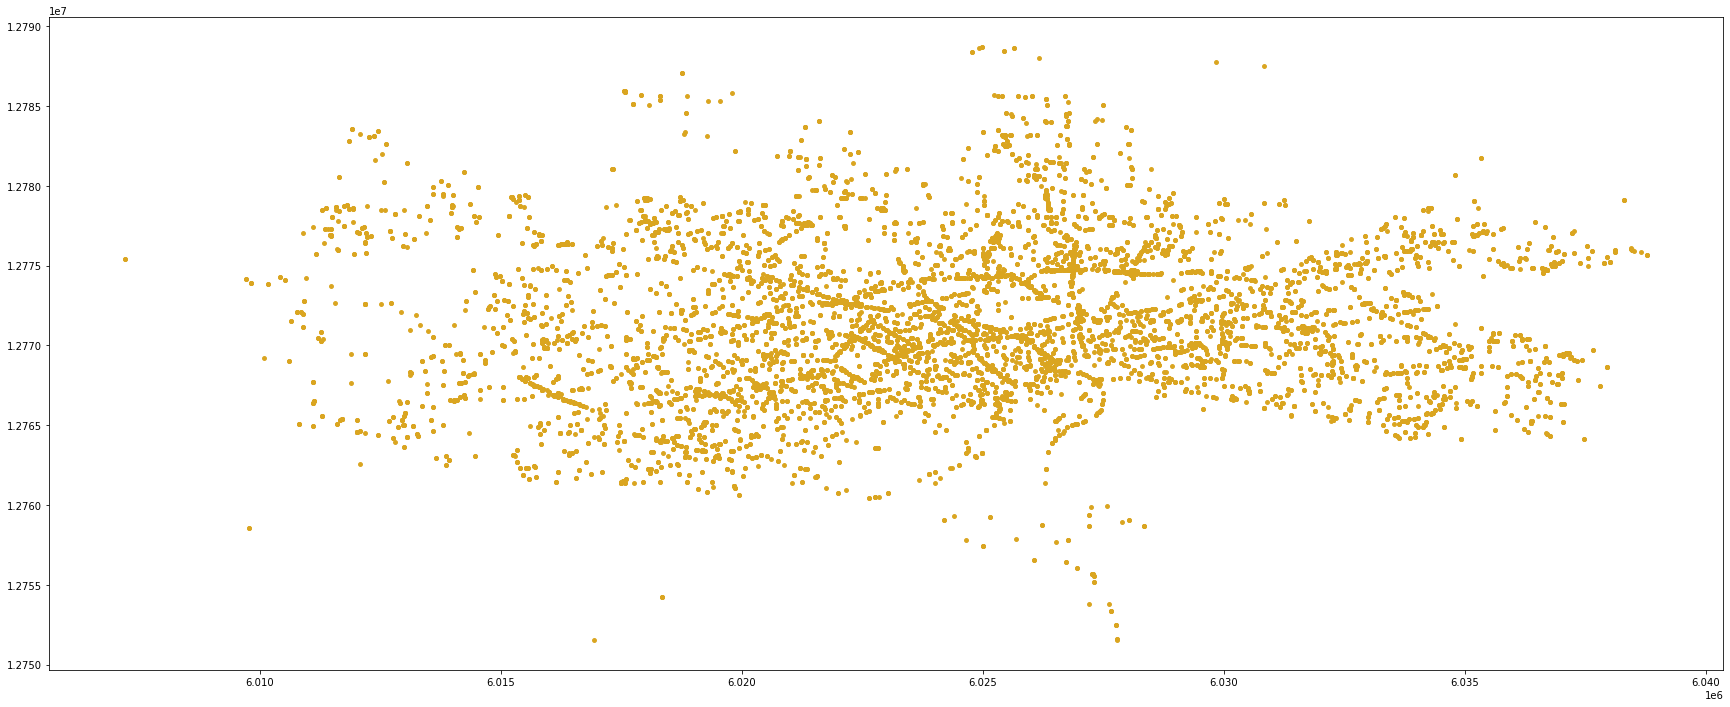

In [53]:
figure = plt.figure(figsize=(30,12))
plt.scatter(coordenadas23.longTran, coordenadas23.latTran, s=15, c='goldenrod')
plt.show()

In [59]:
mapa = folium.Map(location=[40.4167,  -3.70325 ])
#mapa = folium.Map(location=[455000,  455000])
coordenadas23.apply(lambda pu:folium.Marker(location=[pu['longTran'], pu['latTran']])
                                             .add_to(mapa), axis=1)

# display the map
mapa

In [17]:
#!pip3 install folium
import folium


In [62]:
tiles=('http://mt0.google.com/vt/lyrs=s&hl=en&x=', 
       '<a href=https://www.openstreetmap.org/about">© OpenStreetMap</a>')
wellCrs = {'init':'epsg:23030'}
figure = plt.figure(figsize=(10,12))
plt.scatter(coordenadas23.longTran, coordenadas23.latTran, s=15, c='orangered')
# mplleaflet.display(crs=wellCrs,tiles=tiles)
mplleaflet.show(fig=figure, crs={'init': 'epsg:23030'})

C:\Users\javi4\anaconda3\lib\site-packages\pyproj\crs\crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\javi4\anaconda3\lib\site-packages\pyproj\crs\crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


AttributeError: 'XAxis' object has no attribute '_gridOnMajor'

In [20]:
import mplleaflet

In [27]:
coordenadas23 = coordenadas23.dropna(subset = ['longTran', 'latTran'])

In [47]:
def rule(row):
        lat, long = utm.to_latlon(row["longTran"], row["latTran"],30,"N")
        return pd.Series({"lat": lat, "long": long})

In [48]:
 coordenadas_23.merge(coordenadas_23.apply(rule, axis=1), left_index= True, right_index= True)

OutOfRangeError: easting out of range (must be between 100,000 m and 999,999 m)

In [33]:
import utm

In [49]:
coordenadas_23

longitud      latitud    longTran      latTran
0      443397.166  4478129.388  443397.166  4478129.388
1      443397.166  4478129.388  443397.166  4478129.388
2      443397.166  4478129.388  443397.166  4478129.388
3      443397.166  4478129.388  443397.166  4478129.388
4      443397.166  4478129.388  443397.166  4478129.388
...           ...          ...         ...          ...
12183  442561.327  4471590.750  442561.327  4471590.750
12184  442561.327  4471590.750  442561.327  4471590.750
12185  442561.327  4471590.750  442561.327  4471590.750
12186  441499.788  4478869.639  441499.788  4478869.639
12187  441499.788  4478869.639  441499.788  4478869.639

[12188 rows x 4 columns]